In [157]:
# most of this code is from:
# https://nbviewer.jupyter.org/github/jennselby/MachineLearningCourseNotes/blob/master/assets/ipynb/LinearRegression.ipynb

#I changed some lines of code that are listed later in the "Exercise One" section
#I attempt to graph by own best-fit line at the bottom of this file after the 3d plot

%matplotlib inline

In [158]:
import numpy.random
from sklearn import linear_model
import matplotlib.pyplot
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd

In [159]:
# setting x variable limits - I changed the limits

MIN_X = -30
MAX_X = 30
NUM_INPUTS = 30

In [160]:
# randomly picks numbers for x

x1 = numpy.random.uniform(low=MIN_X, high=MAX_X, size=(NUM_INPUTS, 1))

print(x1)

[[ -3.16222226]
 [ 22.17676908]
 [  3.64054007]
 [-22.31646176]
 [  6.88270655]
 [ 19.82334117]
 [ 24.95302641]
 [-22.75476862]
 [-13.76391608]
 [ 17.95369412]
 [ 28.5737881 ]
 [  5.59978798]
 [-20.63639261]
 [-22.69268596]
 [ -5.74205738]
 [-28.20179277]
 [ 20.76250387]
 [ 14.55551716]
 [ 13.05485287]
 [ 24.88593065]
 [  5.47621081]
 [-11.50260108]
 [ 25.02913478]
 [-23.33934742]
 [  9.95412672]
 [-24.32045532]
 [ -6.5530987 ]
 [  8.80001122]
 [-10.24071672]
 [ 19.1360245 ]]


In [161]:
# displays the "fake x" data in a spreadsheet-like format

data = pd.DataFrame(data = x1, columns = ['x'])
data.head()

,x
0,-3.162222
1,22.176769
2,3.640540
3,-22.316462
4,6.882707


In [162]:
# follows the equation "y = 0.3x + 1"

data['y'] = 0.3 * data['x'] + 3

#data['y'] = data['x'] ** 2

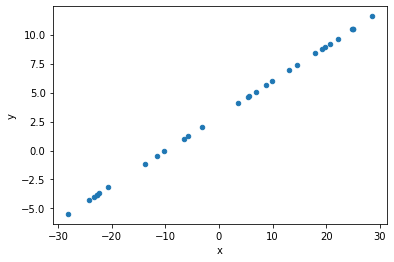

In [163]:
# plots the data in a 2D plane

data.plot.scatter(x='x', y='y')

In [164]:
# creating noise

noise = numpy.random.normal(size=NUM_INPUTS)

In [165]:
# creating the y variable with noise

data['y'] = data['y'] + noise

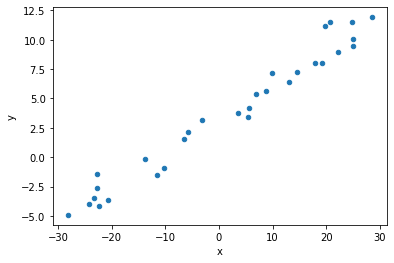

In [166]:
# plotting the realistic data

data.plot.scatter(x='x', y='y')

In [167]:
# training the model to find the best fit line

# creating the empty linear model

model1 = linear_model.LinearRegression()

In [168]:
x = data['x'].values.reshape(-1, 1)
y = data['y'].values.reshape(-1, 1)

In [169]:
# fitting the data to be used for the line

model1.fit(X=x, y=y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [170]:
# displays the results of the training

def print_model_fit(model):
    # Print out the parameters for the best fit line
    print('Intercept: {i}  Coefficients: {c}'.format(i=model.intercept_, c=model.coef_))

In [171]:
# executing the function

print_model_fit(model1)

Intercept: [3.24870832]  Coefficients: [[0.29316829]]


In [172]:
# print out guesses for x values

new_x_values = [ [-1.23], [0.36], [1.45]]

predictions = model1.predict(new_x_values)

print(predictions)

[[2.88811132]
 [3.35424891]
 [3.67380235]]


In [173]:
# using string formatting, print out the data 

for datapoint, prediction in zip(new_x_values, predictions):
    print('Model prediction for {}: {}'.format(datapoint[0], prediction))

Model prediction for -1.23: [2.88811132]
Model prediction for 0.36: [3.35424891]
Model prediction for 1.45: [3.67380235]


In [174]:
# plotting the line of best fit

def plot_best_fit_line(model, x, y):
    # formatting the graph
    fig = matplotlib.pyplot.figure(1)
    fig.suptitle('Data and Best-Fit Line')
    matplotlib.pyplot.xlabel('x values')
    matplotlib.pyplot.ylabel('y values')
    
    # place points on the graph
    matplotlib.pyplot.scatter(x, y)
    
    #plot the line of best fit
    
    X = numpy.linspace(MIN_X, MAX_X) # generates all the possible values of x
    Y = model.predict(list(zip(X)))
    matplotlib.pyplot.plot(X, Y)

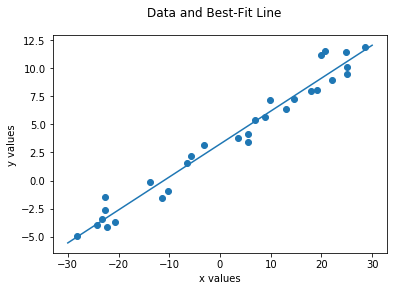

In [175]:
plot_best_fit_line(model1, x, y)

In [176]:
#Exercise 1 questions

# print_model_fit formats the intercept and coefficient (slope) data in a readable and comprehensible format for human eyes
# based on the original given equation of the graph, I expected the new data to be the result of the x values multiplied by the coefficient and added to the intercept. This seems to be the case
# I expect a line of best fit to be drawn cleanly through the clustered data points, approximating the overall shape of the graph

# Lines chosen: 7, 15, 46

# Hypotheses: 

# Line 7: This line will change the window size of the graph, adding variety to the position of various points
# Line 15: This line will change the overall shape of the linear function
# Line 46: These inputs will affect the overall predictions of the line of best fit- based on the results, it seems to affect the output prediction based on an input value

# Testing:

# Line 7: Changed the window size to [-1000, 1000] and the number of inputs to 3000. The result was as expected

# Line 15: The linear function is altered based on the slope input or the y intercept. The shape of the line itself is not exactly altered, but the window size adjust to fit the given parameters

# Line 46: It seems that this data doesn’t exactly alter the shape of the line itself, but rather serves as a way to represent how the computer guesses the outputs for certain x values

In [177]:
#Part two of exercise one - 3d plotting

In [178]:
# generating noise

noise = numpy.random.normal(size=NUM_INPUTS)

# randomly pick numbers for x 

x1 = numpy.random.uniform(low=MIN_X, high=MAX_X, size=NUM_INPUTS)
x2 = numpy.random.uniform(low=MIN_X, high=MAX_X, size=NUM_INPUTS)

y = 0.5 * x1 - 0.2 * x2 - 2 + noise

In [179]:
# maps data using pandas

data2 = pd.DataFrame(data=x1, columns = ['x1'])

In [180]:
data2['x2'] = x2
data2['y'] = y

In [181]:
data2.head()

,x1,x2,y
0,5.474167,-14.010772,1.634032
1,-5.393711,17.093234,-8.133311
2,9.345977,-4.985674,5.695484
3,-27.316992,-28.135342,-9.419042
4,26.999591,-28.813903,18.425241


In [182]:
# using scikit-learn's linear regression model

model2 = linear_model.LinearRegression()
model2.fit(data2[['x1', 'x2']], data2['y'])

#Print out parameters

print_model_fit(model2)

Intercept: -1.8585763947055964  Coefficients: [ 0.50260128 -0.2124193 ]


In [183]:
# this function will plot the data in 3d

def plot_3d(model, x1, x2, y): 
    # create the figure
    fig = matplotlib.pyplot.figure(1)
    fig.suptitle('3D Data and Best-Fit Plane')
    
    # get axes and create a projection
    axes = fig.gca(projection='3d')
    axes.set_xlabel('x1')
    axes.set_ylabel('x2')
    axes.set_zlabel('y')
    
    # scatter the points
    
    axes.scatter(x1, x2, y)
    
    # predict for input points to find the best-fit line
    
    X1 = X2 = numpy.arange(MIN_X, MAX_X, 0.05)
    X1, X2 = numpy.meshgrid(X1, X2)
    Y = numpy.array(model.predict(list(zip(X1.flatten(), X2.flatten())))).reshape(X1.shape)
    
    # place the plane on the graph
    
    axes.plot_surface(X1, X2, Y, alpha=0.1)
    
    matplotlib.pyplot.show()
    

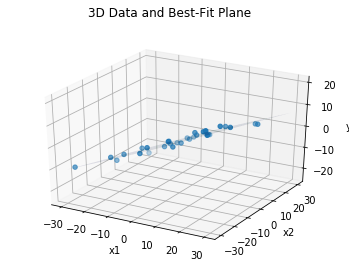

In [184]:
plot_3d(model2, x1, x2, y)

In [185]:
# graphing SAT data with a best-fit line

# SAT scores are often used to "predict" college GPA, and this exercise tests the linear relationship between the score and the corresponding GPA. 
# Whether or not a linear relationship exists is not as important as graphing a theoretical best-fit line

# Two graphs will be created: one for the SAT math score and another for the SAT reading score. 


In [13]:
min_x = 558
max_x = 718
num_inputs = 15

In [14]:
x3 = [[643],
      [558],
      [583],
      [685],
      [592],
      [562],
      [573],
      [559],
      [552],
      [617],
      [684],
      [568],
      [604],
      [619],
      [642],
      [683],
      [703],
      [712],
      [564],
      [557],
      [591],
      [599],
      [607],
      [619],
      [700],
      [718]]

In [15]:
print(x3)

[[643], [558], [583], [685], [592], [562], [573], [559], [552], [617], [684], [568], [604], [619], [642], [683], [703], [712], [564], [557], [591], [599], [607], [619], [700], [718]]


In [47]:
import pandas as pd

data3 = pd.DataFrame(data = x3, columns = ['x'])
data3.head()

,x
0,643
1,558
2,583
3,685
4,592


In [48]:
y3 = [[3.76],
[2.87],
[2.54],
[3.83],
[3.29],
[2.64],
[2.86],
[2.03],
[2.81],
[3.41],
[3.61],
[2.48],
[3.21],
[3.52],
[3.41],
[3.52],
[3.84],
[3.64],
[2.14],
[2.21],
[3.17],
[3.01],
[3.17],
[3.01],
[3.72],
[3.78]]

In [49]:
print(y3)

[[3.76], [2.87], [2.54], [3.83], [3.29], [2.64], [2.86], [2.03], [2.81], [3.41], [3.61], [2.48], [3.21], [3.52], [3.41], [3.52], [3.84], [3.64], [2.14], [2.21], [3.17], [3.01], [3.17], [3.01], [3.72], [3.78]]


In [50]:
data4 = pd.DataFrame(data = y3, columns = ['y'])
data4.head()

,y
0,3.76
1,2.87
2,2.54
3,3.83
4,3.29


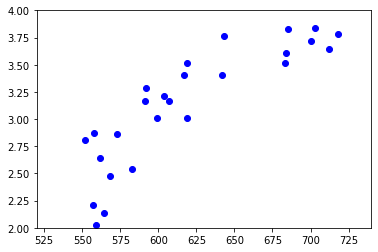

In [60]:
import matplotlib.pyplot as plt
plt.plot(x3, y3, 'bo')
plt.axis([520, 740, 2, 4])
plt.show()

In [64]:
import numpy.random
from sklearn import linear_model
from mpl_toolkits.mplot3d import Axes3D

In [74]:
linear_model_GPA = linear_model.LinearRegression()

linear_model_GPA.fit(X=x3, y=y3)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [75]:
def plot_GPA_line(model, x, y):
    fig = matplotlib.pyplot.figure(1)
    fig.suptitle('GPA Predictions')
    plt.xlabel('SAT Math')
    plt.ylabel('Predicted GPA')
    
    plt.scatter(x, y)
    X = numpy.linspace(min_x, max_x)
    Y = model.predict(list(zip(X)))
    plt.plot(X, Y)

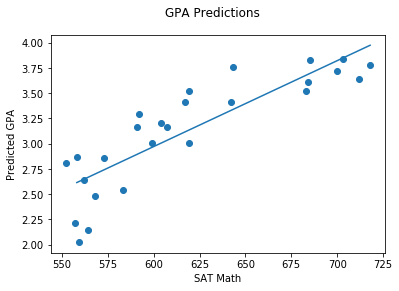

In [76]:
plot_GPA_line(linear_model_GPA, x3, y3)